## Análise de variantes das charadas cripto-aritméticas

#### I) SEND + MORE = MONEY
#### II) WOW + HOT = TEA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Dados do # de soluções por variantes das charadas cripto-aritméticas

In [3]:
send = pd.read_csv("Data-charadas/PC-send1.csv")
hot = pd.read_csv("Data-charadas/PC-hot.dat")
hot.columns = ['palavra','solucao']

In [9]:
send[['palavra','solucao']].head()

,palavra,solucao
0,"['-', '-', 'm', '-', 'e', 'o', 'n', 'm', 'e', ...",6.0
1,"['-', 'n', 'e', '-', 'e', 'o', 'm', 'e', 'm', ...",45.0
2,"['e', 'n', '-', 'm', 'o', 'e', '-', 'o', 'm', ...",0.0
3,"['-', 'e', 'e', 'o', 'o', '-', 'm', 'm', '-', ...",6.0
4,"['n', '-', '-', 'm', 'o', '-', 'o', 'm', 'e', ...",0.0


In [10]:
hot[['palavra','solucao']].head()

,palavra,solucao
0,"('-', '-', 't', 'w', 'o', 'w', 't', 'o', '-')",105
1,"('-', 't', 'w', 't', 'o', 'w', 'o', '-', '-')",53
2,"('-', 'w', 't', 't', 'o', 'o', '-', 'w', '-')",75
3,"('w', 't', 't', '-', '-', 'o', 'o', 'w', '-')",57
4,"('o', '-', '-', 'w', 't', 'w', '-', 't', 'o')",95


#### Histograma combinações por solução WOWHOTTEA

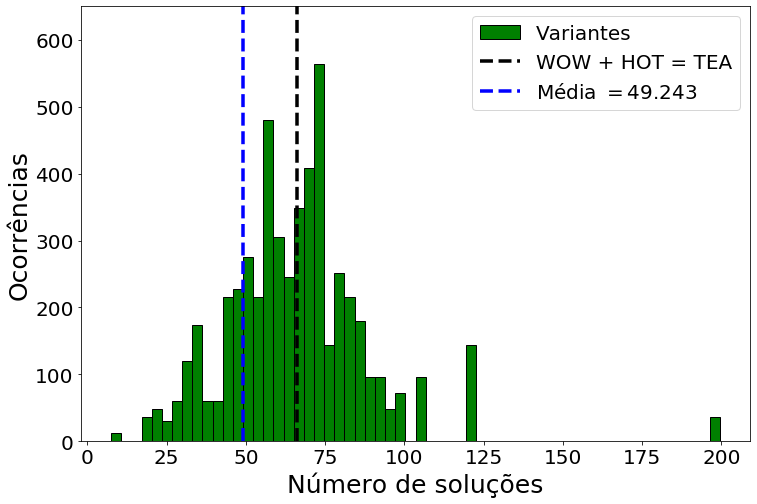

In [11]:
f = hot.copy()

fig,axs = plt.subplots(figsize = (12,8))

axs.set_ylabel('Ocorrências', fontsize = 25)
axs.set_xlabel('Número de soluções', fontsize = 25)

axs.hist(f['solucao'][f['solucao'].between(1,f['solucao'].max()-1)]-0.5,align = 'mid',bins = 60,histtype ='barstacked', color = 'green', edgecolor = 'black', label = 'Variantes')

mean, dev= f['solucao'].mean(), f['solucao'].std(0)

axs.vlines(66,0,750,linestyle='--', linewidth = 3.5,color = 'black', label = 'WOW + HOT = TEA')
axs.vlines(mean,0,750,linestyle='--', linewidth = 3.5,color = 'blue', label = 'Média $= {}$'.format(np.round(mean,3)))

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

axs.legend(fontsize = 20)

plt.ylim(0,650)

#fig.savefig('../Gráficos/hist-wht.png')

plt.show()



#### Histograma combinações por solução SENDMOREMONEY

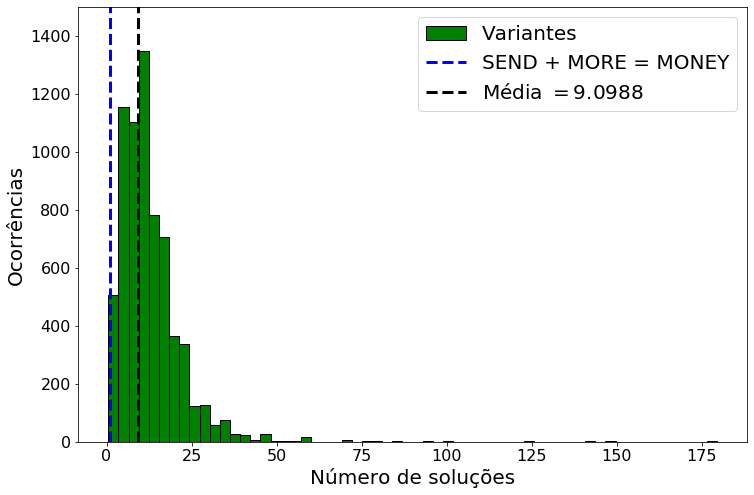

In [12]:
f = send.copy()
fig,axs = plt.subplots(figsize = (12,8))

axs.set_ylabel('Ocorrências', fontsize = 20)
axs.set_xlabel('Número de soluções', fontsize = 20)

axs.hist(f['solucao'][f['solucao'].between(1,f['solucao'].max()-110)]-0.5,align = 'mid',bins = 60,histtype ='bar', color = 'green', edgecolor = 'black', 
        label = 'Variantes')
mean, dev= f['solucao'].mean(), f['solucao'].std(0)

axs.vlines(1,0,2000,linestyle='--', linewidth = 3,color = 'blue', label = 'SEND + MORE = MONEY')
axs.vlines(mean,0,2000,linestyle='--', linewidth = 3,color = 'black', label = 'Média $= {}$'.format(np.round(mean,4)))


'''
plt.annotate(r"$SEND + MORE = MONEY$", 
            xy=(1, 600),
            xycoords='data',
            xytext=(50, 1000),
            textcoords='data',
            fontsize = 14,
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.annotate(r"$\bar{x} = 9.098$", 
            xy=(9, 800),
            xycoords='data',
            xytext=(50, 1300),
            textcoords='data',
            fontsize = 16,
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
'''

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

axs.legend(fontsize = 20)
plt.ylim(0,1500)


#fig.savefig('../Gráficos/hist-smm.png')

plt.show()

#### Histograma comparativo SENDMOREMONEY e WOWHOTTEA

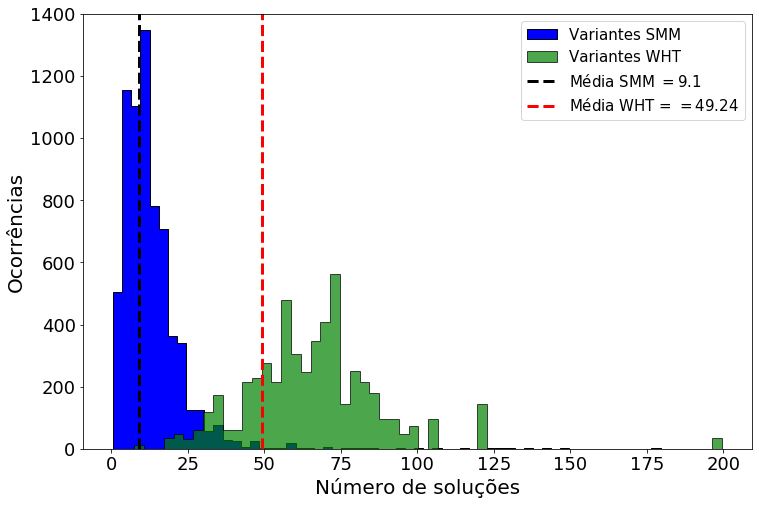

In [13]:
f1 = send.copy()
f2 = hot.copy()

fig,axs = plt.subplots(figsize = (12,8))

labs = ['Variantes SMM', 'Variantes WHT']

axs.set_ylabel('Ocorrências', fontsize = 20)
axs.set_xlabel('Número de soluções', fontsize = 20)

axs.hist(f1['solucao'][f1['solucao'].between(1,f1['solucao'].max()-110)]-0.5,align = 'mid',bins = 60,histtype ='stepfilled', 
         color = 'blue', edgecolor = 'black', label = labs[0])
axs.hist(f2['solucao'][f2['solucao'].between(1,f2['solucao'].max()-110)]-0.5,align = 'mid',bins = 60,histtype ='stepfilled', alpha = 0.7
         ,color = 'green', edgecolor = 'black',label = labs[1])

m1 = np.round(f1['solucao'].mean(),2)
m2 = np.round(f2['solucao'].mean(),2)

axs.vlines(f1['solucao'].mean(),0,1500,linestyle = '--', linewidth = 3, color = 'black', label = 'Média SMM $= {}$'.format(m1))
axs.vlines(f2['solucao'].mean(),0,1500,linestyle = '--', linewidth = 3,color = 'red', label = 'Média WHT = $= {}$'.format(m2))

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.ylim(0,1400)
axs.legend(fontsize = 15)


#fig.savefig('../Gráficos/hist-comparativo.png')

plt.show()